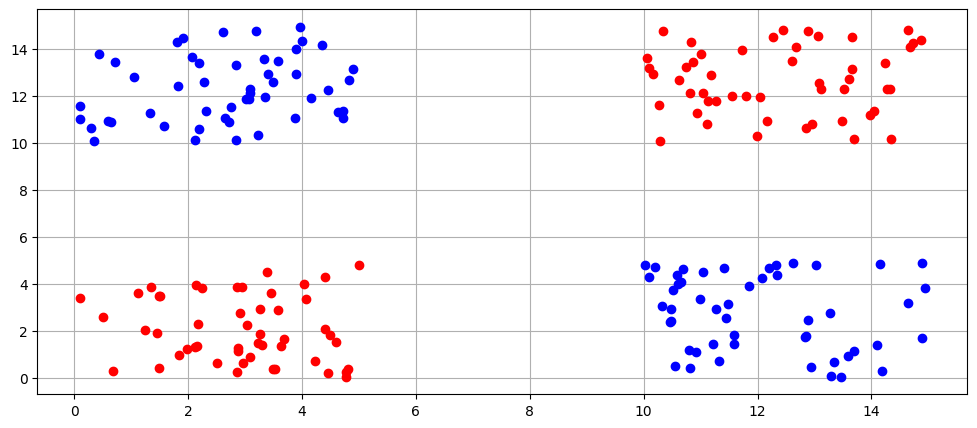

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

x11 = np.random.uniform(low=0, high=5, size=(50,))
x12 = np.random.uniform(low=10, high=15, size=(50,))
x21 = np.random.uniform(low=0, high=5, size=(50,))
x22 = np.random.uniform(low=10, high=15, size=(50,))


x1 = np.append(x11, x12)
x2 = np.append(x21, x22)

y11 = np.random.uniform(low=10, high=15, size=(50,))
y12 = np.random.uniform(low=0, high=5, size=(50,))
y21 = np.random.uniform(low=0, high=5, size=(50,))
y22 = np.random.uniform(low=10, high=15, size=(50,))

y1 = np.append(y11, y12)
y2 = np.append(y21, y22)

x_1 = np.vstack([x1, y1]).T
x_2 = np.vstack([x2, y2]).T
y_1 = np.ones_like(x_1[:, 0])
y_2 = np.zeros_like(x_2[:, 0])
x = np.vstack([x_1, x_2])
y = np.hstack([y_1, y_2])


fig, ax = plt.subplots(figsize = (12,5))
ax.plot(x_1[:, 0], x_1[:,1], 'bo')
ax.plot(x_2[:,0], x_2[:,1], 'ro')
ax.grid()

Epoch 1/60
7/7 [==============================] - 0s 1ms/step - loss: 1.4497 - accuracy: 0.5000
Epoch 2/60
7/7 [==============================] - 0s 1ms/step - loss: 0.7264 - accuracy: 0.4750
Epoch 3/60
7/7 [==============================] - 0s 2ms/step - loss: 0.7058 - accuracy: 0.3550
Epoch 4/60
7/7 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.5500
Epoch 5/60
7/7 [==============================] - 0s 1ms/step - loss: 0.7025 - accuracy: 0.5100
Epoch 6/60
7/7 [==============================] - 0s 1ms/step - loss: 0.6952 - accuracy: 0.5400
Epoch 7/60
7/7 [==============================] - 0s 1000us/step - loss: 0.6971 - accuracy: 0.5400
Epoch 8/60
7/7 [==============================] - 0s 1ms/step - loss: 0.7028 - accuracy: 0.5400
Epoch 9/60
7/7 [==============================] - 0s 1ms/step - loss: 0.7036 - accuracy: 0.5500
Epoch 10/60
7/7 [==============================] - 0s 1000us/step - loss: 0.6963 - accuracy: 0.5700
Epoch 11/60
7/7 [================

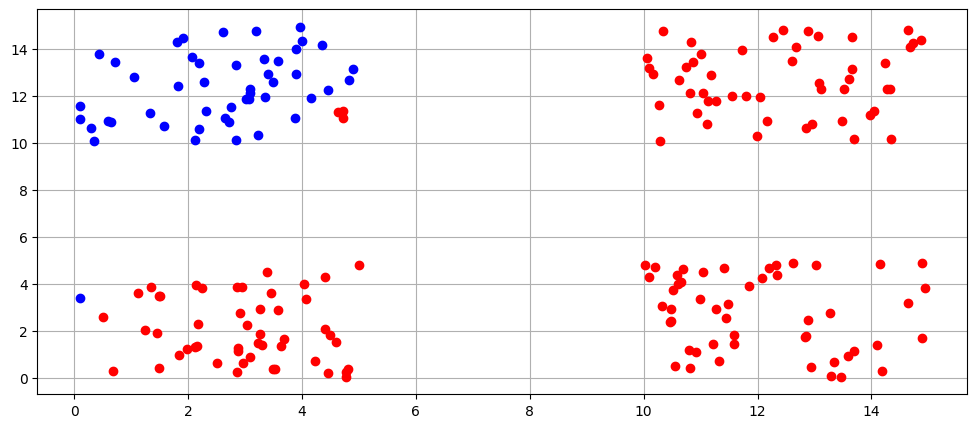

In [2]:
# 단층 레이어
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x, y, epochs=60)

preds = model.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()

단층 퍼셉트론으로는 XOR문제를 해결할 수 없다. 

Epoch 1/60


c:\Users\elyse\anaconda3\envs\s4\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


7/7 [==============================] - 0s 1ms/step - loss: 1.0433 - accuracy: 0.6150
Epoch 2/60
7/7 [==============================] - 0s 1ms/step - loss: 0.3472 - accuracy: 0.8650
Epoch 3/60
7/7 [==============================] - 0s 2ms/step - loss: 0.2922 - accuracy: 0.8750
Epoch 4/60
7/7 [==============================] - 0s 1ms/step - loss: 0.2587 - accuracy: 0.8900
Epoch 5/60
7/7 [==============================] - 0s 1ms/step - loss: 0.2353 - accuracy: 0.8900
Epoch 6/60
7/7 [==============================] - 0s 2ms/step - loss: 0.2448 - accuracy: 0.8850
Epoch 7/60
7/7 [==============================] - 0s 2ms/step - loss: 0.2066 - accuracy: 0.9100
Epoch 8/60
7/7 [==============================] - 0s 1ms/step - loss: 0.1997 - accuracy: 0.8950
Epoch 9/60
7/7 [==============================] - 0s 1ms/step - loss: 0.1938 - accuracy: 0.9150
Epoch 10/60
7/7 [==============================] - 0s 1ms/step - loss: 0.1798 - accuracy: 0.9250
Epoch 11/60
7/7 [==============================] -

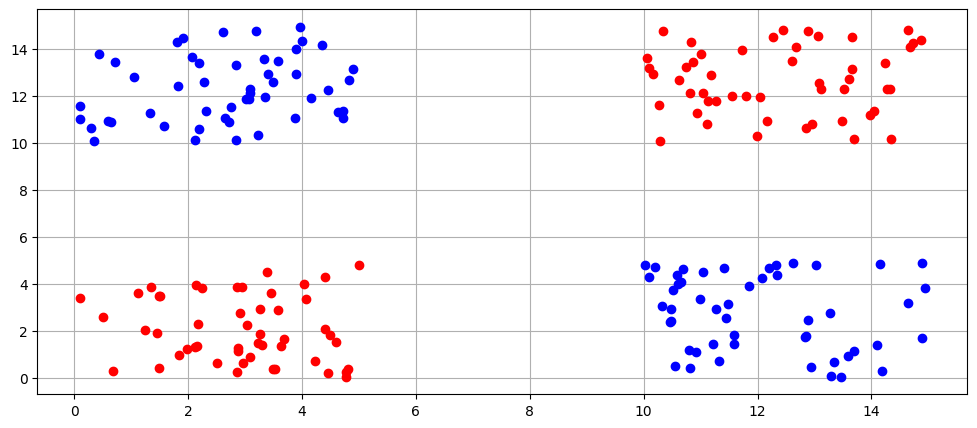

In [3]:
# 다중 레이어
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(100, activation='ReLU'),
    tf.keras.layers.Dense(100, activation='ReLU'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer=tf.keras.optimizers.SGD(lr=0.1, clipvalue=1),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model2.fit(x, y, epochs=60)

preds = model2.predict(x)
preds_1d = preds.flatten()
pred_class = np.where(preds_1d > 0.5, 1 , 0)

y_true = x[pred_class==1]
y_false = x[pred_class==0]

fig, ax = plt.subplots(figsize = (12,5))
ax.plot(y_true[:, 0], y_true[:,1], 'bo')
ax.plot(y_false[:,0], y_false[:,1], 'ro')
ax.grid()

다중 퍼셉트론 인공신경망으로 XOR분류를 해결할 수 있다.